In [1]:
# working directory settings
import os, sys
cwd = os.getcwd()
cwd

'/content'

## Prerequisite
- install ratatoskr-tools package
- install ratatoskr-simulator prerequisite
- compile ratatoskr-simulator

### Install ratatoskr-tools package

In [2]:
# ratatoskr-tools installation
! git clone https://github.com/jmjos/ratatoskr-tools/
os.chdir("./ratatoskr-tools/")
# ! git checkout dev-yang
! git checkout 3d-torus
! pip install . --upgrade
os.chdir(cwd)

Cloning into 'ratatoskr-tools'...
remote: Enumerating objects: 703, done.
remote: Counting objects: 100% (703/703), done.
remote: Compressing objects: 100% (454/454), done.
remote: Total 703 (delta 384), reused 551 (delta 240), pack-reused 0
Receiving objects: 100% (703/703), 2.09 MiB | 17.44 MiB/s, done.
Resolving deltas: 100% (384/384), done.
Branch '3d-torus' set up to track remote branch '3d-torus' from 'origin'.
Switched to a new branch '3d-torus'
Processing /content/ratatoskr-tools
  Created wheel for ratatoskr-tools: filename=ratatoskr_tools-2021.2-cp37-none-any.whl size=26379 sha256=29bcd1170c87a724384d62024764065b37a1cbf957c31d1d4256c0f5112187c9
  Stored in directory: /root/.cache/pip/wheels/4b/3c/35/e71e3fa81a7488013b8ae0243d62dfe71354fed406a4c275ab
Successfully built ratatoskr-tools


### Install ratatoskr-simulator prerequisite

In [3]:
# simulator prerequisite installation
!sudo apt update
!sudo apt -y install libpugixml-dev python3-venv libboost-program-options-dev libboost-system-dev

# system-c installation
! wget https://accellera.org/images/downloads/standards/systemc/systemc-2.3.3.tar.gz
! tar -xf systemc-2.3.3.tar.gz
os.chdir("systemc-2.3.3")
os.makedirs("objdir")
os.chdir("objdir")
! ../configure --prefix=/usr/local/systemc-2.3.3 --enable-static CXXFLAGS="-std=c++17"
! make -j
! sudo mkdir /usr/local/systemc-2.3.3
! sudo make install
os.chdir(cwd)


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,402 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packa

## Compile ratatoskr simulator

In [4]:
# simulator compilation
! git clone https://github.com/yangyt96/ratatoskr
os.chdir("./ratatoskr/simulator")
# ! git checkout new-feat-2021-02
! git checkout 3d-torus
! git status
! cmake -DDEFINE_ENABLE_NETRACE=ON
# ! cmake .
! make
os.chdir(cwd)

Cloning into 'ratatoskr'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 4864 (delta 127), reused 124 (delta 71), pack-reused 4665
Receiving objects: 100% (4864/4864), 125.33 MiB | 27.32 MiB/s, done.
Resolving deltas: 100% (3135/3135), done.
Branch '3d-torus' set up to track remote branch '3d-torus' from 'origin'.
Switched to a new branch '3d-torus'
On branch 3d-torus
Your branch is up to date with 'origin/3d-torus'.

nothing to commit, working tree clean
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++

In [ ]:
import ratatoskr_tools.networkconfig as rtcfg
import ratatoskr_tools.simulation as rtsim
import ratatoskr_tools.datahandle as rtdat
import ratatoskr_tools.dataplot as rtdplt
import ratatoskr_tools.networkplot as rtnplt

SIM_PATH = "./ratatoskr/simulator/sim"

if not os.path.isdir("./example/"):
  os.makedirs("./example/")

# rtcfg.create_config_ini("./example/config.ini")

In [ ]:
config = rtcfg.create_configuration("./example/config.ini", "./example/config.xml", "./example/network.xml")

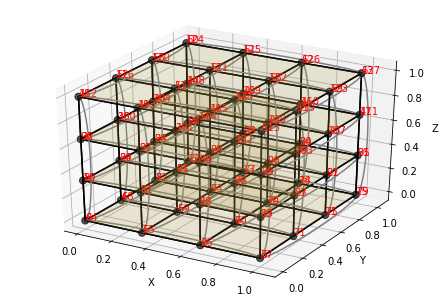

In [ ]:
fig_network = rtnplt.plot_static("./example/network.xml", plt_show=True, output_file="./example/test.png")

In [ ]:
import numpy as np

# initialization of variables
vc_usages = []
buff_usages = []
inj_rates = np.arange(config.runRateMin, config.runRateMax, config.runRateStep).round(4)
lats_flit = -np.ones((len(inj_rates), config.restarts))
lats_packet = -np.ones((len(inj_rates), config.restarts))
lats_network = -np.ones((len(inj_rates), config.restarts))

rtsim.remove_all_simdirs("./example/", config.restarts)

for idx, inj_rate in enumerate(inj_rates):

    simdirs = rtsim.make_all_simdirs("./example/", config.restarts)

    rtcfg.edit_config_file(config, "./example/config.xml", "./example/config_tmp.xml", inj_rate)

    rtsim.run_parallel_multiple_sims(simdirs, SIM_PATH, "./example/config.xml", "./example/network.xml")

    vc_usages.append(rtdat.retrieve_vc_usages(simdirs, config))
    buff_usages.append(rtdat.retrieve_buff_usages(simdirs, config))
    lats_flit[idx], lats_packet[idx], lats_network[idx] = rtdat.retrieve_diff_latencies(simdirs)

    rtsim.remove_all_simdirs("./example/", config.restarts)

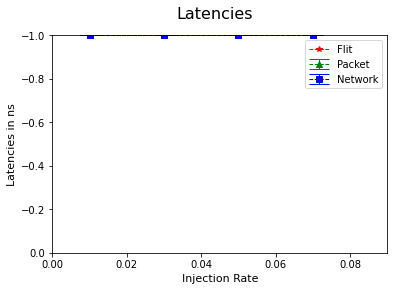

In [ ]:
fig_latencies = rtdplt.plot_latencies(inj_rates, lats_flit, lats_packet, lats_network, plt_show=True)

In [ ]:
from subprocess import call

url = "https://www.cs.utexas.edu/~netrace/download/blackscholes_64c_simsmall.tra.bz2"
if not os.path.isfile("blackscholes_64c_simsmall.tra.bz2"):
    call(["wget", url])


rtsim.run_single_sim(SIM_PATH, "./example/config.xml", "./example/network.xml", output_dir="./example/", stdout="./example/log",
    simTime=10000,
    netraceTraceFile="blackscholes_64c_simsmall.tra.bz2",
    netraceRegion=0,
    netraceVerbosity="all"
    )

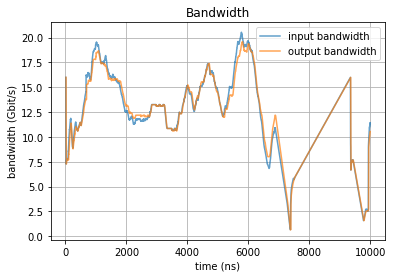

In [ ]:
inout_bw = rtdat.retrieve_inoutput_bandwidth("./example", interval=500)
fig = rtdplt.plot_bandwidth(*inout_bw, plt_show=True)